In [132]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [133]:
print(sys.path)

['C:\\Users\\Admin\\anaconda3\\python311.zip', 'C:\\Users\\Admin\\anaconda3\\DLLs', 'C:\\Users\\Admin\\anaconda3\\Lib', 'C:\\Users\\Admin\\anaconda3', 'c:\\Country_Clustering_Project_CNS\\venv', '', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Country_Clustering_Project_CNS\\venv\\Lib\\site-packages\\Pythonwin', 'c:\\Country_Clustering_Project_CNS', 'c:\\Country_Clustering_Project_CNS', 'c:\\Country_Clustering_Project_CNS']


In [134]:
# import sys, os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))


In [135]:
from src.data_loader import load_data
from src import config

In [136]:
csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
df = pd.read_csv(csv_path)
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [137]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [139]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [140]:
df_use = df.copy(deep= True) # D√πng cho sau n√†y

## EDA

In [141]:
df_ve = df.copy(deep = True)
df_ve.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [142]:
df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"T·ªïng s·ªë l∆∞·ª£ng c·ªôt l√† {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') T·ªïng s·ªë l∆∞·ª£ng c·ªôt l√† 9


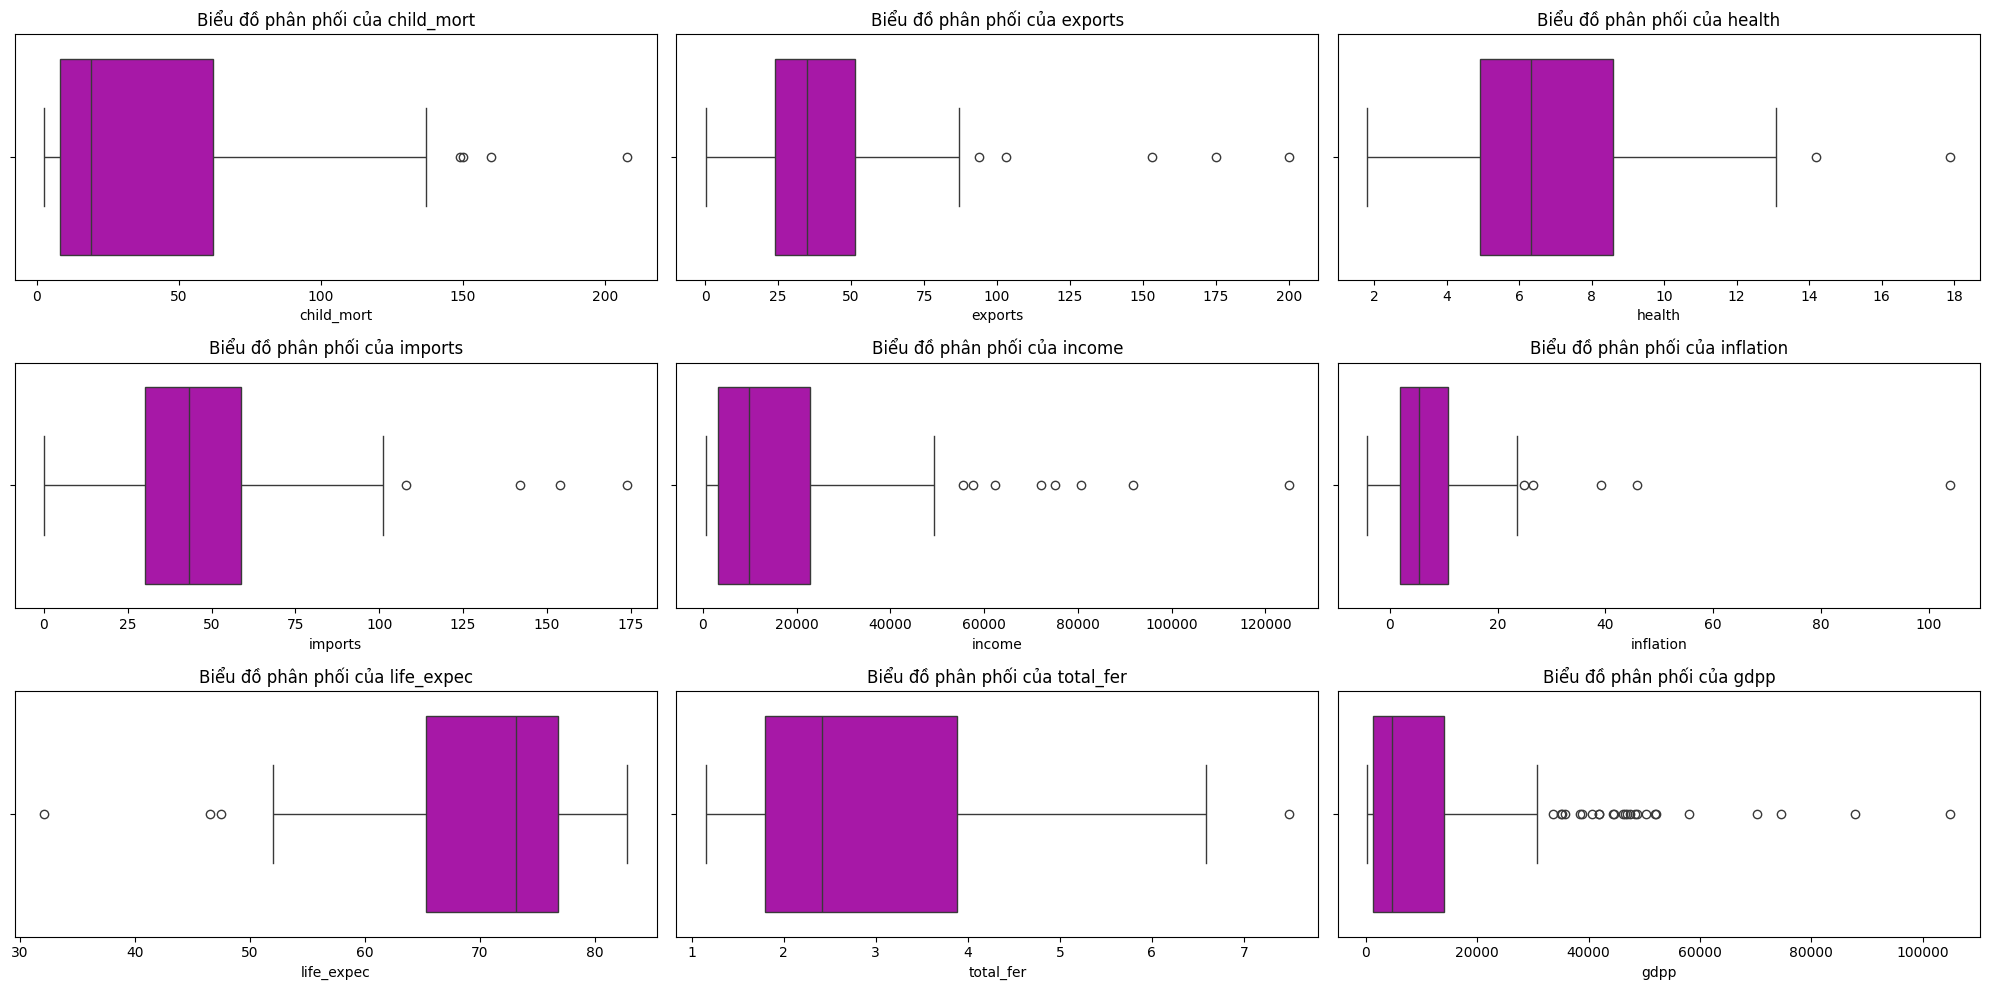

In [143]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa {title}")
plt.tight_layout()

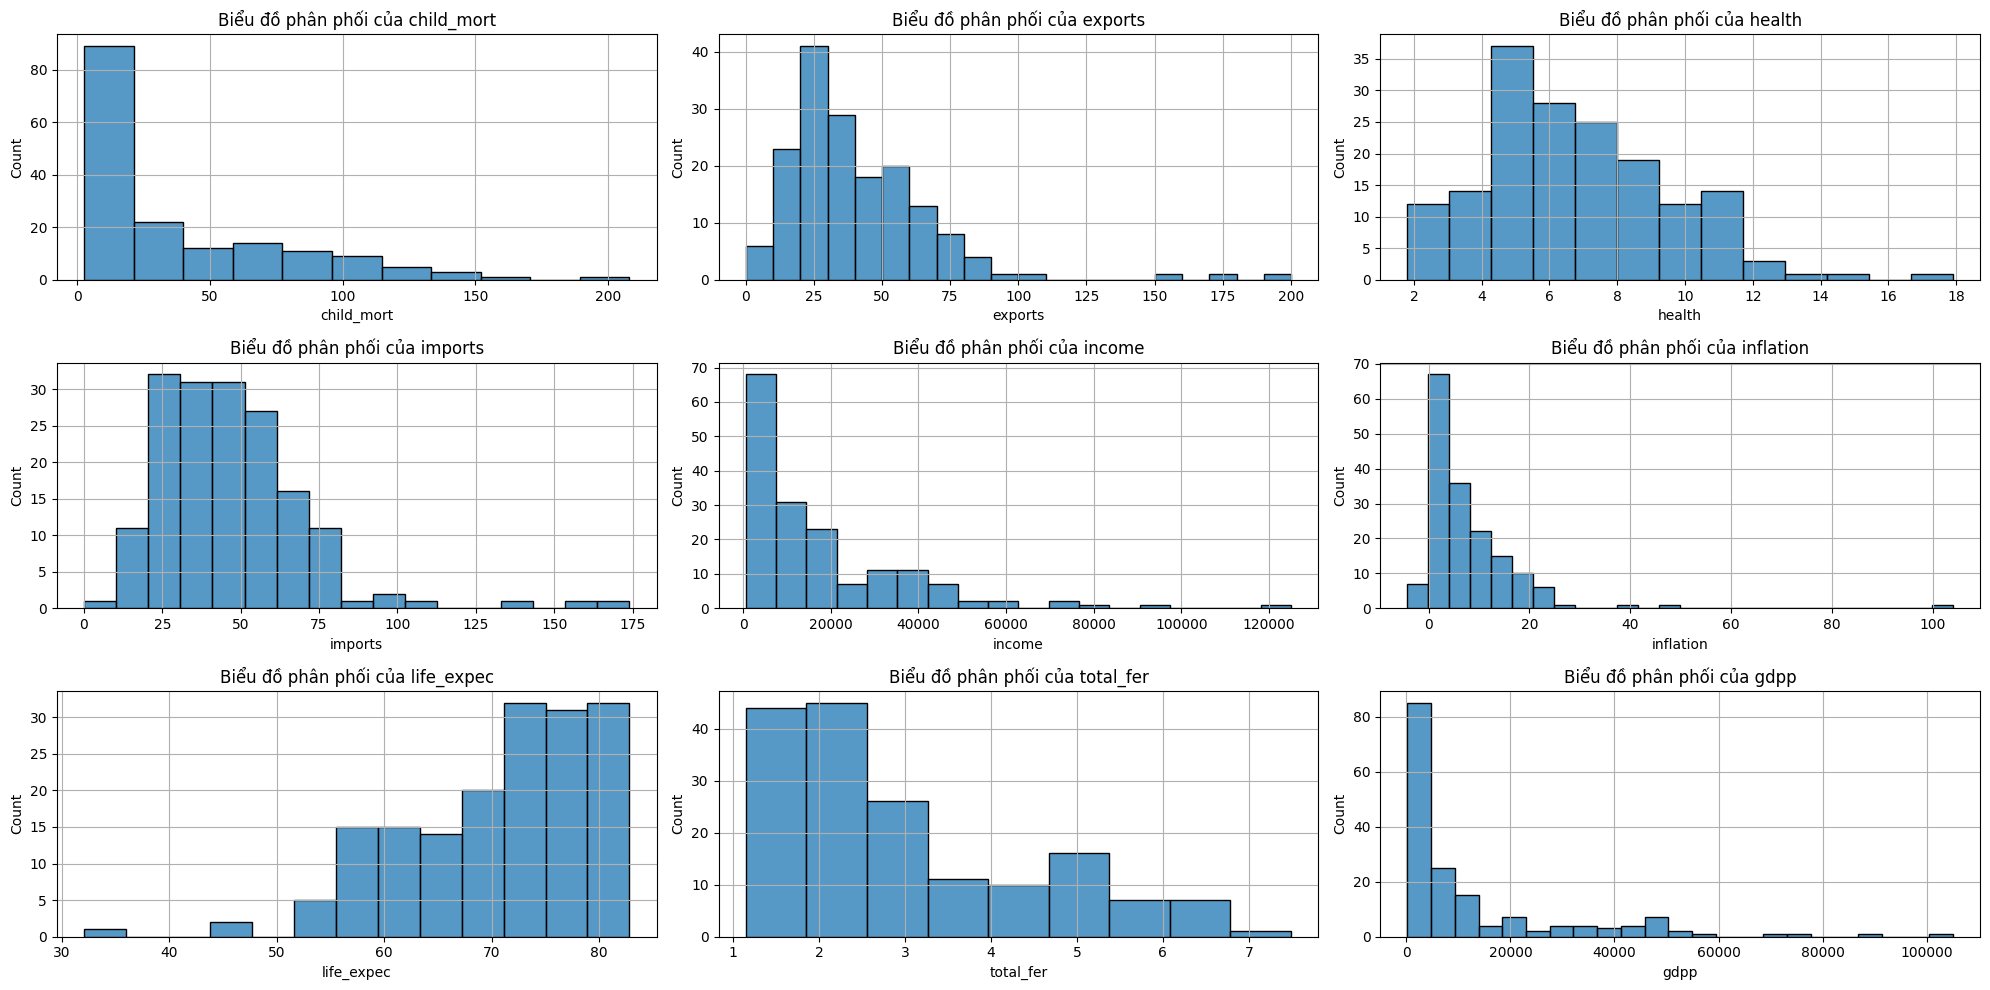

In [144]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa {title}")
plt.tight_layout()
        

## Ph√¢n b·ªë d·ªØ li·ªáu

- **Health**: Ph√¢n ph·ªëi g·∫ßn v·ªõi chu·∫©n, v·ªõi ƒë·ªânh ·ªü kho·∫£ng 4‚Äì5.
- **Life expectancy**: Ph√¢n ph·ªëi l·ªách tr√°i ‚Äì ph·∫ßn l·ªõn qu·ªëc gia c√≥ tu·ªïi th·ªç cao, m·ªôt s·ªë √≠t th·∫•p.
- C√°c ch·ªâ s·ªë c√≤n l·∫°i (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) ƒë·ªÅu **l·ªách ph·∫£i**, v·ªõi ƒë·ªânh ·ªü m·ª©c th·∫•p v√† ƒëu√¥i k√©o d√†i v·ªÅ ph√≠a c√°c gi√° tr·ªã cao.

## T√¨nh tr·∫°ng kinh t·∫ø v√† x√£ h·ªôi

- **Thu nh·∫≠p b√¨nh qu√¢n ƒë·∫ßu ng∆∞·ªùi** r·∫•t th·∫•p (ƒëa s·ªë d∆∞·ªõi 2000 USD).
- **GDP b√¨nh qu√¢n ƒë·∫ßu ng∆∞·ªùi** c≈©ng th·∫•p ‚Äì ph·∫£n √°nh s·ª± gi√†u c√≥ th·∫•p.
- **C·ªßa c·∫£i v√† thu nh·∫≠p** ph√¢n b·ªï kh√¥ng ƒë·ªìng ƒë·ªÅu, th·ªÉ hi·ªán r√µ qua c√°c gi√° tr·ªã ngo·∫°i l·ªá cao.
- **M·ª©c s·ªëng** kh√¥ng ƒë·ªìng ƒë·ªÅu gi·ªØa c√°c qu·ªëc gia ‚Äì th·ªÉ hi·ªán qua s·ª± ch√™nh l·ªách l·ªõn trong thu nh·∫≠p v√† tu·ªïi th·ªç trung b√¨nh.

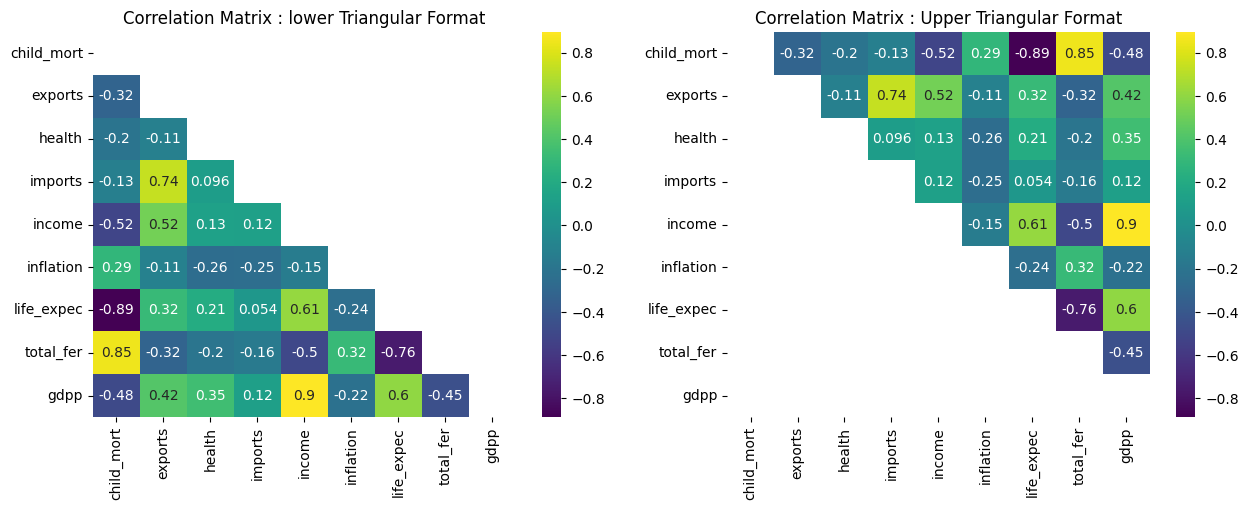

In [145]:
upper_triangle = np.tril(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## üß† Ph√¢n t√≠ch m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng v√† t√¨nh tr·∫°ng qu·ªëc gia

### üìâ ·∫¢nh h∆∞·ªüng c·ªßa ƒëi·ªÅu ki·ªán kinh t·∫ø ƒë·∫øn s·ª©c kh·ªèe v√† d√¢n s·ªë

- **T·ª∑ l·ªá tr·∫ª t·ª≠ vong cao** th∆∞·ªùng x·∫£y ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **gi·∫£m**.
  - `inflation` **tƒÉng**.
- ƒêi·ªÅu n√†y cho th·∫•y **ƒëi·ªÅu ki·ªán kinh t·∫ø ·∫£nh h∆∞·ªüng nghi√™m tr·ªçng** ƒë·∫øn s·ª©c kh·ªèe v√† tu·ªïi th·ªç c·ªßa ng∆∞·ªùi d√¢n.
- `inflation` tƒÉng ‚Üí **t·ª∑ l·ªá t·ª≠ vong v√† t·ª∑ l·ªá sinh ƒë·ªÅu tƒÉng** ‚áí ph·∫£n √°nh c√°c **qu·ªëc gia k√©m ph√°t tri·ªÉn**.

### üåç Vai tr√≤ c·ªßa xu·∫•t nh·∫≠p kh·∫©u

- Khi `exports` **tƒÉng**:
  - `gdpp`, `imports`, `life_expec` **tƒÉng**.
  - `child_mort` v√† `total_fer` **gi·∫£m**.
- Cho th·∫•y **xu·∫•t nh·∫≠p kh·∫©u ƒë√≥ng vai tr√≤ quan tr·ªçng** trong vi·ªác th√∫c ƒë·∫©y tƒÉng tr∆∞·ªüng kinh t·∫ø v√† c·∫£i thi·ªán ch·∫•t l∆∞·ª£ng cu·ªôc s·ªëng.

---

### üèÅ K·∫øt lu·∫≠n: 3 nh√≥m ƒë·∫∑c tr∆∞ng ch√≠nh ƒë√°nh gi√° t√¨nh tr·∫°ng qu·ªëc gia

| Nh√≥m ƒë·∫∑c tr∆∞ng | Thu·ªôc t√≠nh li√™n quan                                      | √ù nghƒ©a t·ªïng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Ph·∫£n √°nh s·ª©c kh·ªèe v√† tu·ªïi th·ªç d√¢n c∆∞     |
| **Trade**      | `exports`, `imports`                                      | ƒêo l∆∞·ªùng m·ª©c ƒë·ªô m·ªü c·ª≠a v√† h·ªôi nh·∫≠p qu·ªëc t·∫ø |
| **Finance**    | `income`, `gdpp`, `inflation`                             | ƒê√°nh gi√° nƒÉng l·ª±c t√†i ch√≠nh v√† ·ªïn ƒë·ªãnh vƒ© m√¥ |

=> D·ª±a tr√™n ba nh√≥m n√†y, c√≥ th·ªÉ **suy ra m·ª©c ƒë·ªô ph√°t tri·ªÉn v√† t√¨nh tr·∫°ng s·ªëng c·ªßa m·ªôt qu·ªëc gia** m·ªôt c√°ch t∆∞∆°ng ƒë·ªëi ch√≠nh x√°c.


In [146]:
from src.data_preprocessing import feature_engineering
df1 = feature_engineering(df)
print("D·ªØ li·ªáu ƒë∆∞·ª£c t·∫°o ra sau khi feature_engineering")
print(df1.head())


ƒê√£ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi
D·ªØ li·ªáu ƒë∆∞·ª£c t·∫°o ra sau khi feature_engineering
      Trade    Health   Finance
0  1.200812  6.239852  1.349645
1  1.717580  3.035901  1.471658
2  1.603752  3.389763  3.165367
3  2.430387  6.469020  3.494919
4  2.362940  2.964898  2.240150


In [147]:
from src.data_preprocessing import use_preprocesing
df1 = use_preprocesing(df , use_pca= False)
print("Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa d·ª± li·ªáu sau khi feature_engineering")
print(df1)


ƒê√£ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi
Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ti√™n c·ªßa d·ª± li·ªáu sau khi feature_engineering
        Trade    Health   Finance
0    0.139614  0.625740  0.079820
1    0.199901  0.127451  0.088756
2    0.186622  0.182485  0.212808
3    0.283058  0.661381  0.236946
4    0.275189  0.116409  0.145043
..        ...       ...       ...
162  0.262886  0.217274  0.035009
163  0.124193  0.133337  0.559740
164  0.403386  0.170070  0.121436
165  0.170248  0.397451  0.229632
166  0.181405  0.526909  0.134997

[167 rows x 3 columns]


## Apply Kmeans vs Feature Engineering

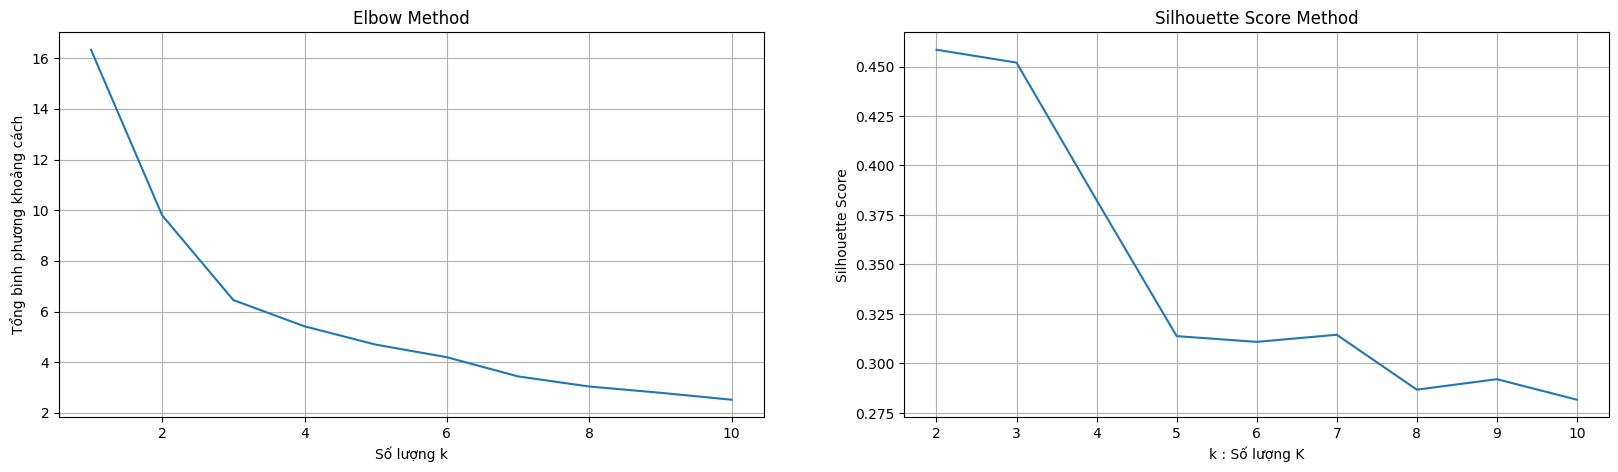

In [148]:
from src.visualization import select_k_for_kmeans
select_k_for_kmeans(df1)


- B·∫±ng ph∆∞∆°ng ph√°p kh·ªßy tay v√† ƒë·ªô ph√¢n bi·ªát th√¨ k = 3 c√≥ th·ªÉ ph√¢n bi·ªát r√µ c√°c c·ª•m n√™n ch·ªçn k = 3

In [149]:
from src.clustering import get_compose
pipe1 = get_compose(
    df,
    use_pca = False , 
    use_kmean= True , 
    n_clusters= 3
)
pipe1

Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function feature_engineering at 0x000002D78A577740>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('mms', MinMaxScaler(),
                                                  ['Trade', 'Finance',
                                                   'Health'])])),
                ('kmean', KMeans(n_clusters=3, random_state=42))])


ƒê√£ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi


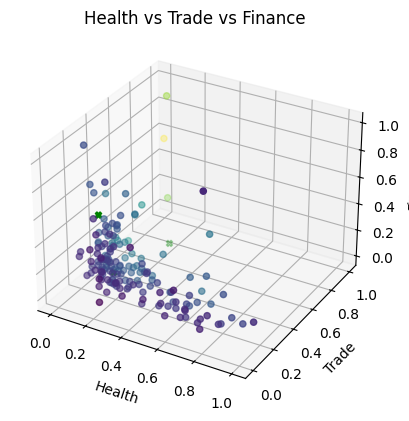

In [150]:
pipe1.fit(df)
labels = pipe1.named_steps["kmean"].labels_
cluster = pipe1.named_steps["kmean"].cluster_centers_
centroids = np.array(cluster)
df['Class'] = labels 
df1['Class'] = labels 

fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="g")
ax.scatter3D(x , y , z , c = y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()



In [151]:
print(pipe1.named_steps['preprocess'])

ColumnTransformer(transformers=[('mms', MinMaxScaler(),
                                 ['Trade', 'Finance', 'Health'])])


- Kh√¥ng x√°c ƒë·ªãnh ƒë∆∞·ª£c
- V·∫Ω t·ª∑ l·ªá t·ª≠ vong v√† thu nh·∫≠p ƒë·ªÉ ph√¢n c·ª•m

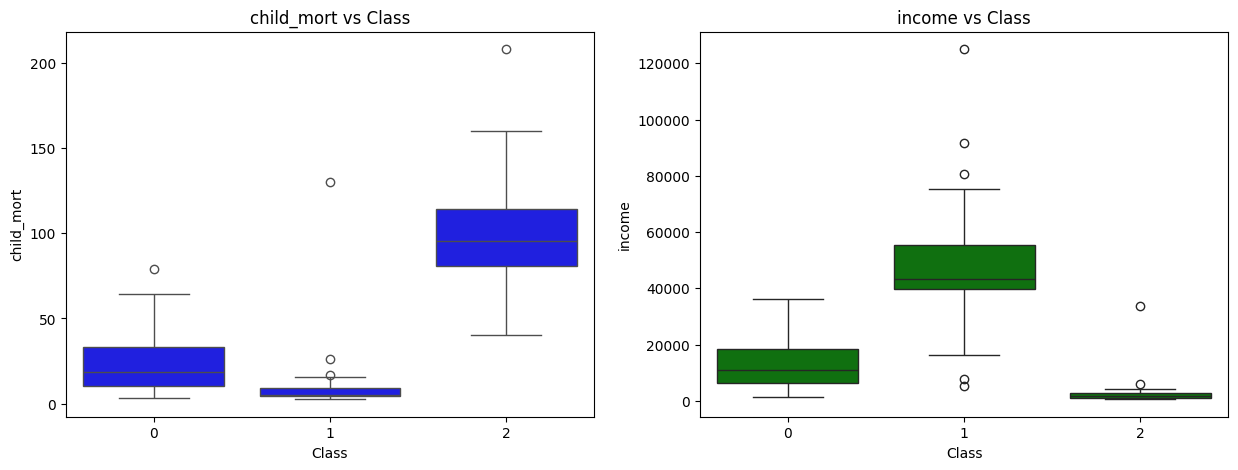

In [152]:
from src.visualization import plot_boxplot_by_class 
plot_boxplot_by_class(df)

## T·ª´ bi·ªÉu ƒë·ªì tr√™n
- 0 :C√≥ th·ªÉ c·∫ßn h·ªô tr·ª£ n·∫øu ƒë·ªß ng√¢n s√°ch
- 2 :C·∫ßn h·ªô tr·ª£ t·ª∑ l·ªá thu nh·∫≠p th·∫•p v√† t·ªâ l·ªá tr·∫ª t∆∞ vong r·∫•t cao
- 1 :Kh√¥ng c·∫ßn ph·∫£i h·ªó tr·ª£

In [153]:
df_result = df1.copy(deep= True)

In [154]:
df1['Class'].loc[df1['Class'] == 0] = 'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£'
df1['Class'].loc[df1['Class'] ==1] = 'Kh√¥ng c·∫ßn h·ªó tr·ª£'
df1['Class'].loc[df1['Class'] ==2] = 'R·∫•t c·∫ßn h·ªó tr·ª£' 

In [155]:
df1['Class'].value_counts()

Class
C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£    102
R·∫•t c·∫ßn h·ªó tr·ª£        36
Kh√¥ng c·∫ßn h·ªó tr·ª£      29
Name: count, dtype: int64

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
res = []
score = silhouette_score(df1.drop("Class" , axis = 1) , labels ,metric="euclidean")
final = df1["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)
res

[{'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 102,
  'R·∫•t c·∫ßn h·ªó tr·ª£': 36,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 29,
  'silhouette_score': 0.45197076714375445}]

## Apply PCA vs Kmeans

In [158]:
from src.data_preprocessing import use_preprocesing
pca_df = use_preprocesing(df_use , use_pca= True)
print(pca_df)

{'df':             0         1         2         3         4         5         6  \
0    0.220482  0.640048  0.086112 -0.051960  0.037643 -0.058159 -0.075908   
1   -0.080903 -0.172000 -0.208695  0.086004 -0.015168 -0.010271  0.043997   
2   -0.961283 -0.125199 -0.126719 -0.052972  0.099536  0.031897  0.045097   
3   -1.505914  0.472144  0.284978 -0.073150  0.091937  0.040967  0.072901   
4   -0.264724 -0.237308 -0.059150  0.078788  0.032929 -0.056938  0.009745   
..        ...       ...       ...       ...       ...       ...       ...   
162 -0.584662  0.089055 -0.023372  0.114258  0.006163 -0.061840 -0.115437   
163 -0.689176 -0.151368 -0.165444 -0.182571  0.119601  0.297074 -0.003919   
164  0.012693 -0.123744 -0.023656  0.300533  0.041350  0.086888  0.039976   
165 -0.628317  0.259154 -0.017196 -0.075314  0.148962  0.059920 -0.012153   
166 -0.394240  0.534131  0.107048 -0.053492 -0.021568  0.018362 -0.138269   

            7         8  
0   -0.043013  0.024713  
1   -0.028919  0

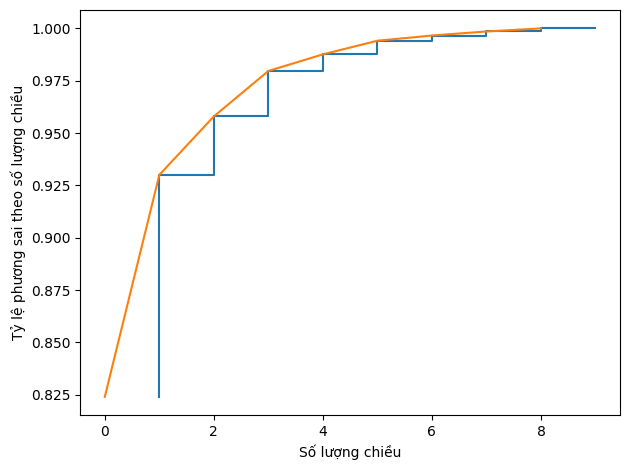

In [159]:
from src.visualization import select_components_pca 
select_components_pca(pca_df['explained_variance_radio'])

- k = 2 c√≥ th·ªÉ gi·∫£i th√≠ch ƒë∆∞·ª£c h∆°n 92% ph∆∞∆°ng sai =>> ch·ªçn

In [160]:
pca_df_result = pca_df['df'][[0,1,2]]
pca_df_result.head()

0         1         2
0  0.220482  0.640048  0.086112
1 -0.080903 -0.172000 -0.208695
2 -0.961283 -0.125199 -0.126719
3 -1.505914  0.472144  0.284978
4 -0.264724 -0.237308 -0.059150

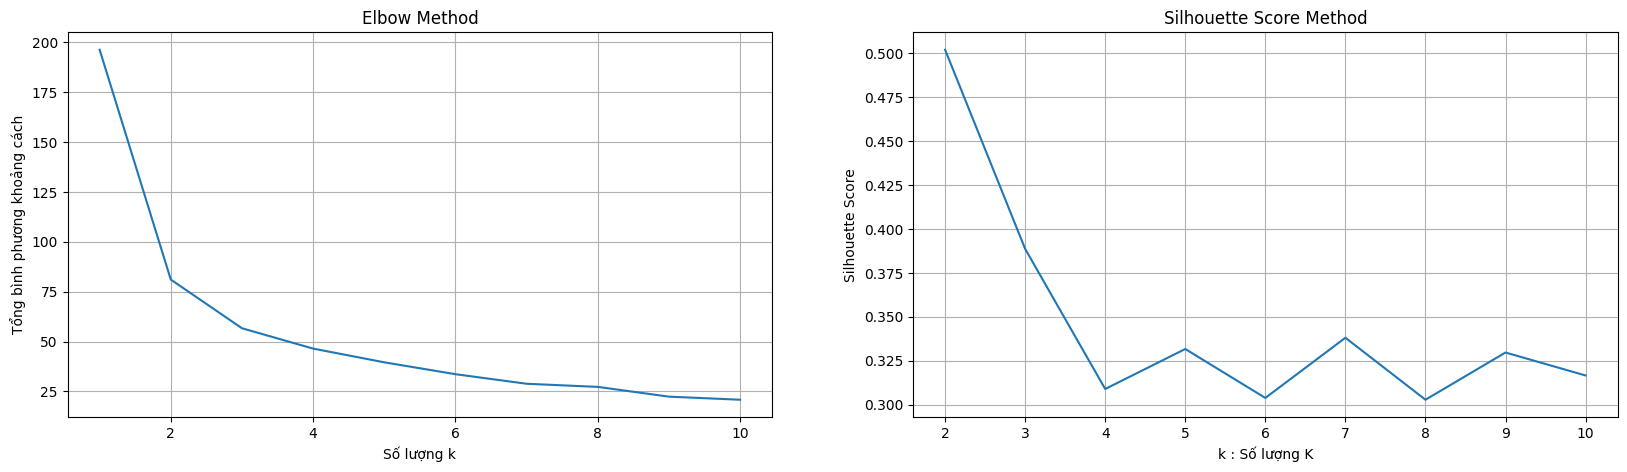

In [161]:
from src.visualization import select_k_for_kmeans
select_k_for_kmeans(pca_df_result)

- Ch·ªçn k = 3 l√† t·ªët nh·∫•t qua bi·ªÉu ƒë·ªì tr√™n

In [162]:
std_cols = ["health"]
mms_cols = list(df_use.select_dtypes(include= np.number).columns)

In [163]:
from src.clustering import get_compose
pipe2 = get_compose(use_pca = True , std_cols= std_cols , mms_cols= mms_cols , use_kmean= True , n_clusters= 3)
pipe2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['health']),
                                                 ('mms', MinMaxScaler(),
                                                  ['child_mort', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expec', 'total_fer',
                                                   'gdpp'])])),
                ('pca', PCA(n_components=3)),
                ('kmean', KMeans(n_clusters=3, random_state=42))])

In [164]:
pipe2.fit(df_use)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['health']),
                                                 ('mms', MinMaxScaler(),
                                                  ['child_mort', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expec', 'total_fer',
                                                   'gdpp'])])),
                ('pca', PCA(n_components=3)),
                ('kmean', KMeans(n_clusters=3, random_state=42))])

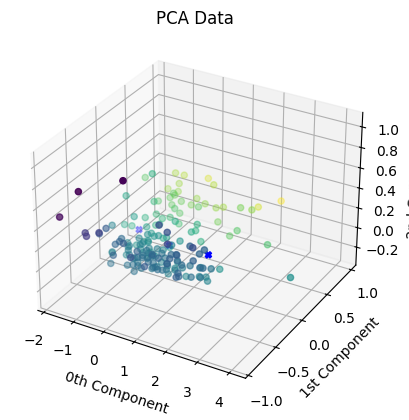

In [165]:
cluster = pipe2.named_steps["kmean"].cluster_centers_
centroids = np.array(cluster)
labels = pipe2.named_steps["kmean"].labels_
df["Class"] = labels 
pca_df_result["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(centroids[: , 0] , centroids[: , 1] , centroids[:,2] , marker = "X" , color ='b')
x = np.array(pca_df_result[0])
y = np.array(pca_df_result[1])
z = np.array(pca_df_result[2])
plt.title("PCA Data")
ax.set_xlabel("0th Component")
ax.set_ylabel("1st Component")
ax.set_zlabel("2nd Component")
ax.scatter(x, y, z, c=y)
plt.show()

- Kh√¥ng ph√¢n bi·ªát ƒë∆∞·ª£c c·ª•m n√†o v·ªõi c·ª•m n√†o v·∫Ω child_mort v√† income ƒë·ªÉ g√°n c·ª•m

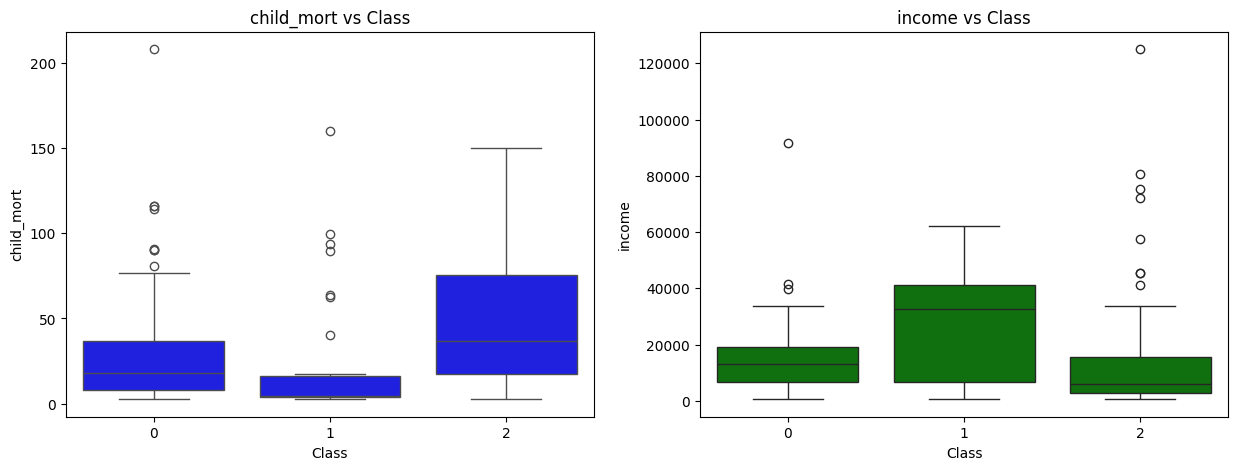

In [166]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## T·ª´ bi·ªÉu ƒë·ªì tr√™n
- 0 :C√≥ th·ªÉ c·∫ßn h·ªô tr·ª£ n·∫øu ƒë·ªß ng√¢n s√°ch
- 2 :C·∫ßn h·ªô tr·ª£ t·ª∑ l·ªá thu nh·∫≠p th·∫•p v√† t·ªâ l·ªá tr·∫ª t∆∞ vong r·∫•t cao
- 1 :Kh√¥ng c·∫ßn ph·∫£i h·ªó tr·ª£

In [167]:

pca_df_result['Class'].loc[pca_df_result['Class'] == 0] = 'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£'
pca_df_result['Class'].loc[pca_df_result['Class'] ==1] = 'Kh√¥ng c·∫ßn h·ªó tr·ª£'
pca_df_result['Class'].loc[pca_df_result['Class'] ==2] = 'R·∫•t c·∫ßn h·ªó tr·ª£' 

In [168]:
score = silhouette_score(pca_df['df'][[0,1,2]] , labels ,metric="euclidean")
final = pca_df_result['Class'].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)
res

[{'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 102,
  'R·∫•t c·∫ßn h·ªó tr·ª£': 36,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 29,
  'silhouette_score': 0.45197076714375445},
 {'R·∫•t c·∫ßn h·ªó tr·ª£': 72,
  'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 62,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 33,
  'silhouette_score': 0.3886965893321663}]

In [169]:
df1['Class']

0         R·∫•t c·∫ßn h·ªó tr·ª£
1      C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
2      C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
3         R·∫•t c·∫ßn h·ªó tr·ª£
4      C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
             ...        
162    C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
163     Kh√¥ng c·∫ßn h·ªó tr·ª£
164    C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
165    C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£
166       R·∫•t c·∫ßn h·ªó tr·ª£
Name: Class, Length: 167, dtype: object

## Apply Hierarchical Clustering

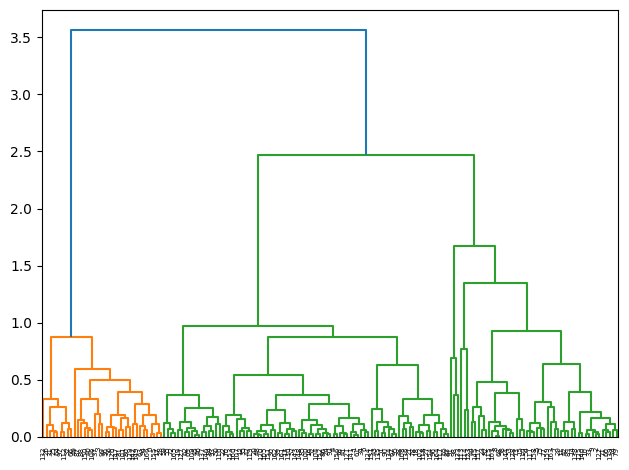

In [170]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_df = linkage(df1.drop("Class" , axis = 1), method = 'ward', metric = 'euclidean')
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- Ch·ªçn k - 3 l√† h·ª£p l√Ω nh·∫•t 

In [171]:
from src.clustering import get_compose

In [172]:
pipe3 = get_compose(
    df_use,
    use_pca = False , 
    use_agglomerative= True
)

In [173]:
pipe3.fit(df)


ƒê√£ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi


Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function feature_engineering at 0x000002D78A577740>)),
                ('preprocess',
                 ColumnTransformer(transformers=[('mms', MinMaxScaler(),
                                                  ['Trade', 'Finance',
                                                   'Health'])])),
                ('agglo', AgglomerativeClustering(n_clusters=3))])

[1 2 0]


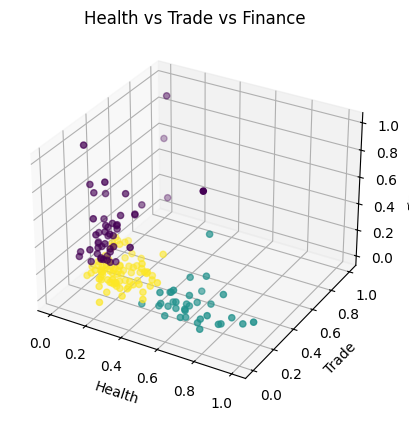

In [174]:
preg_agc = pd.Series(pipe3.named_steps["agglo"].labels_)
print(preg_agc.unique())
df["Class"] = preg_agc
df1["Class"] = preg_agc
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show()

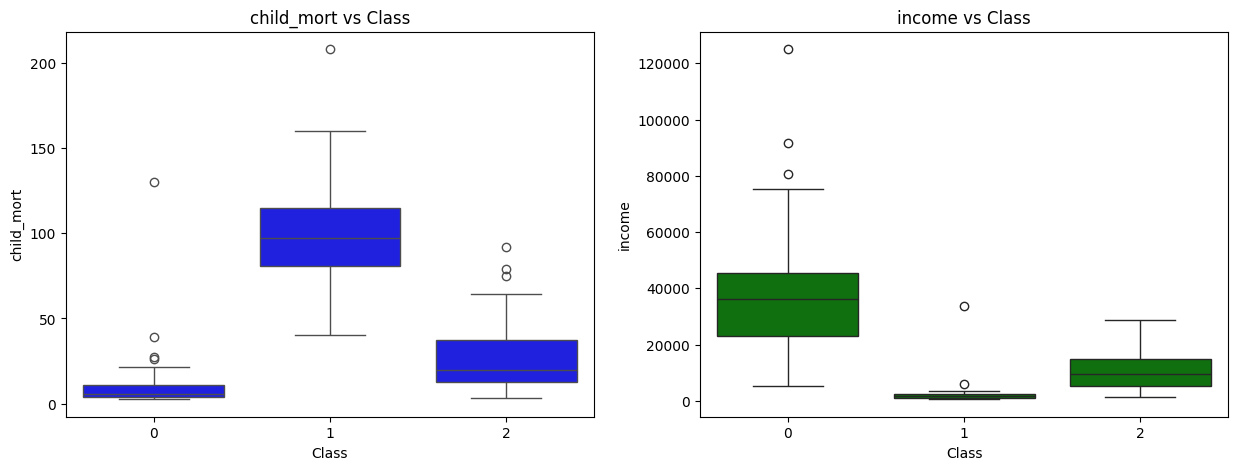

In [175]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## T·ª´ bi·ªÉu ƒë·ªì tr√™n
- 0 :Kh√¥ng c·∫ßn h·ªó tr·ª£
- 1 :C·∫ßn h·ªô tr·ª£ t·ª∑ l·ªá thu nh·∫≠p th·∫•p v√† t·ªâ l·ªá tr·∫ª t∆∞ vong r·∫•t cao
- 2 :C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£

In [176]:
df1['Class'].loc[df1['Class'] == 0] = 'Kh√¥ng c·∫ßn h·ªó tr·ª£'
df1['Class'].loc[df1['Class'] ==1] = 'R·∫•t c·∫ßn h·ªó tr·ª£'
df1['Class'].loc[df1['Class'] ==2] = 'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£' 

In [177]:
score = silhouette_score(df1.drop("Class" , axis = 1), preg_agc, metric='euclidean')
final = df1["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)

In [178]:
res

[{'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 102,
  'R·∫•t c·∫ßn h·ªó tr·ª£': 36,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 29,
  'silhouette_score': 0.45197076714375445},
 {'R·∫•t c·∫ßn h·ªó tr·ª£': 72,
  'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 62,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 33,
  'silhouette_score': 0.3886965893321663},
 {'C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£': 83,
  'Kh√¥ng c·∫ßn h·ªó tr·ª£': 49,
  'R·∫•t c·∫ßn h·ªó tr·ª£': 35,
  'silhouette_score': 0.37795779229139226}]

## Apply Hierarchical Clustering vs PCA

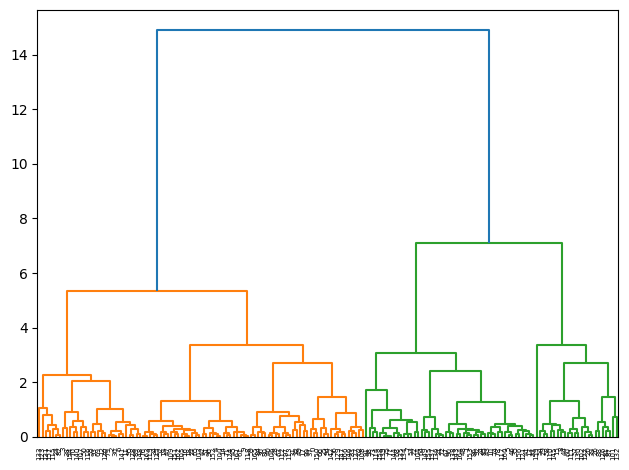

In [179]:
from src.clustering import get_compose
from scipy.cluster.hierarchy import dendrogram , linkage
linkage_df = linkage(pca_df_result.drop("Class" , axis = 1) , method = 'ward' , metric = "euclidean")
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- T·ª´ bi·ªÉu ƒë·ªì tr√™n ch·ªçn k = 4 l√† h·ª£p l√Ω nh·∫•t

In [180]:
pipe4 = get_compose(
    std_cols = std_cols , 
    mms_cols = mms_cols , 
    use_pca= True , 
    use_agglomerative=True , 
    n_clusters=4
)
pipe4

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['health']),
                                                 ('mms', MinMaxScaler(),
                                                  ['child_mort', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expec', 'total_fer',
                                                   'gdpp'])])),
                ('pca', PCA(n_components=3)),
                ('agglo', AgglomerativeClustering(n_clusters=4))])

In [181]:
pipe4.fit(df_use.drop('country' , axis = 1))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['health']),
                                                 ('mms', MinMaxScaler(),
                                                  ['child_mort', 'exports',
                                                   'health', 'imports',
                                                   'income', 'inflation',
                                                   'life_expec', 'total_fer',
                                                   'gdpp'])])),
                ('pca', PCA(n_components=3)),
                ('agglo', AgglomerativeClustering(n_clusters=4))])

In [182]:
pipe4.named_steps

{'preprocess': ColumnTransformer(transformers=[('std', StandardScaler(), ['health']),
                                 ('mms', MinMaxScaler(),
                                  ['child_mort', 'exports', 'health', 'imports',
                                   'income', 'inflation', 'life_expec',
                                   'total_fer', 'gdpp'])]),
 'pca': PCA(n_components=3),
 'agglo': AgglomerativeClustering(n_clusters=4)}

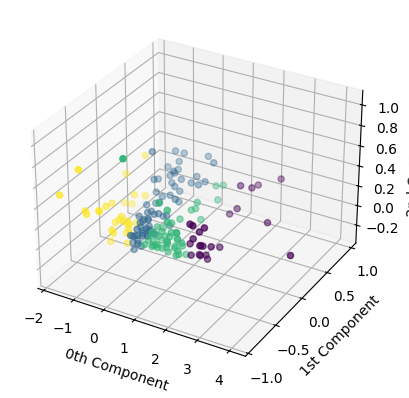

In [183]:
preg_agc = pd.Series(pipe4.named_steps['agglo'].labels_)
df["Class"] = preg_agc 
pca_df_result["Class"] = preg_agc 
fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(pca_df_result[0])
y = np.array(pca_df_result[1])
z = np.array(pca_df_result[2])
ax.scatter(x , y , z , c = pca_df_result["Class"])
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

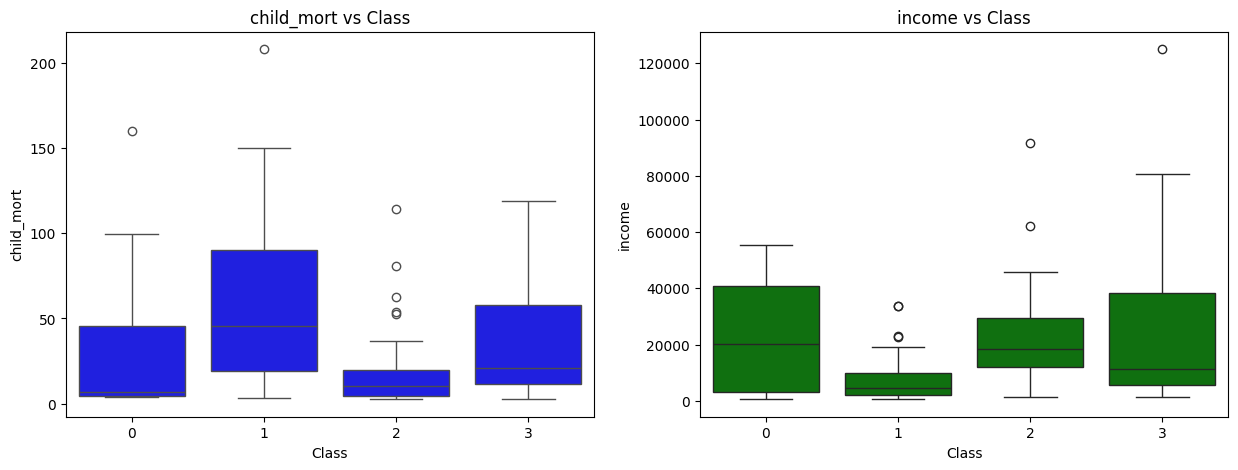

In [184]:
from src.visualization import plot_boxplot_by_class
plot_boxplot_by_class(df)

## T·ª´ bi·ªÉu ƒë·ªì tr√™n
- 0 :r·∫•t c·∫ßn h·ªó tr·ª£
- 2 :C·∫ßn h·ªô tr·ª£
- 1 C√≥ th·ªÉ kh√¥ng c·∫ßn h·ªó tr·ª£
- 3 : c√≥ th·ªÉ c·∫ßn h·ªó tr·ª£

In [185]:
pca_df_result["Class"].loc[pca_df_result["Class"] == 0] = "R·∫•t c·∫ßn h·ªó tr·ª£"
pca_df_result["Class"] = pca_df_result["Class"].apply(lambda x : "C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£" if x in [2,3] else x)
pca_df_result["Class"].loc[pca_df_result["Class"] == 1] = "Kh√¥ng c·∫ßn h·ªó tr·ª£"

In [186]:
score = silhouette_score(pca_df_result.drop("Class" , axis = 1) , preg_agc ,metric="euclidean")
final = pca_df_result["Class"].value_counts().to_dict()
final["silhouette_score"] = score
res.append(final)

In [187]:
result = pd.DataFrame(res , index=["Kmean_Feature_Combination", 'Kmean_PCA' , 'Hierarchical_Feature_Combination', 'Hierarchical_PCA'])
result

C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£  R·∫•t c·∫ßn h·ªó tr·ª£  \
Kmean_Feature_Combination                       102              36   
Kmean_PCA                                        62              72   
Hierarchical_Feature_Combination                 83              35   
Hierarchical_PCA                                 79              24   

                                  Kh√¥ng c·∫ßn h·ªó tr·ª£  silhouette_score  
Kmean_Feature_Combination                       29          0.451971  
Kmean_PCA                                       33          0.388697  
Hierarchical_Feature_Combination                49          0.377958  
Hierarchical_PCA                                64          0.340138

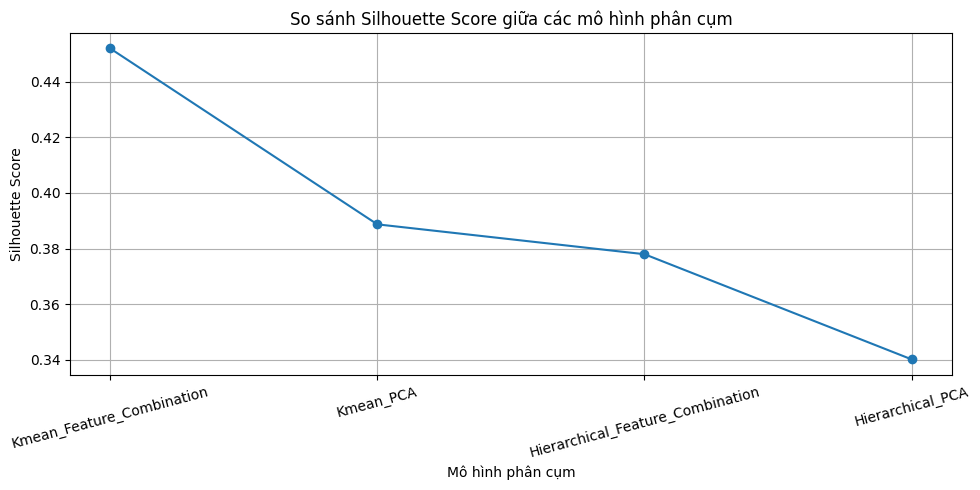

C√≥ th·ªÉ c·∫ßn h·ªó tr·ª£  R·∫•t c·∫ßn h·ªó tr·ª£  \
Kmean_Feature_Combination                       102              36   
Kmean_PCA                                        62              72   
Hierarchical_Feature_Combination                 83              35   
Hierarchical_PCA                                 79              24   

                                  Kh√¥ng c·∫ßn h·ªó tr·ª£  silhouette_score  
Kmean_Feature_Combination                       29          0.451971  
Kmean_PCA                                       33          0.388697  
Hierarchical_Feature_Combination                49          0.377958  
Hierarchical_PCA                                64          0.340138

In [188]:
import matplotlib.pyplot as plt

labels = ["Kmean_Feature_Combination", "Kmean_PCA", "Hierarchical_Feature_Combination", "Hierarchical_PCA"]
scores = result["silhouette_score"]  # ƒë·∫£m b·∫£o ƒë√¢y l√† list ho·∫∑c Series

plt.figure(figsize=(10, 5))
plt.plot(labels, scores, marker='o')
plt.xlabel("M√¥ h√¨nh ph√¢n c·ª•m")
plt.ylabel("Silhouette Score")
plt.title("So s√°nh Silhouette Score gi·ªØa c√°c m√¥ h√¨nh ph√¢n c·ª•m")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()
result

## Nh·∫≠n x√©t 
- T·∫≠p d·ªØ li·ªáu s·∫°ch
- M√¥ h√¨nh pipe1 T·ªët nh·∫•t th·ªÉ hi·ªán qua sihoutte_score = 0.45 
- C√°c m√¥ h√¨nh sau kh√¥ng t·ªët b·∫±ng 
* => Ch·ªçn m√¥ h√¨nh Kmean_Feature_Combination

In [189]:
parent_dir = os.path.dirname(os.getcwd())
model_dir = os.path.join(parent_dir, "model")
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "model.pkl")
import joblib 
joblib.dump(pipe1, model_path)
print(f"Pipeline ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: {model_path}")

Pipeline ƒë√£ ƒë∆∞·ª£c l∆∞u t·∫°i: c:\Country_Clustering_Project_CNS\model\model.pkl


In [190]:
os.path.dirname(os.getcwd())
os.path.join(os.path.dirname(os.getcwd()) , 'model')

'c:\\Country_Clustering_Project_CNS\\model'

In [191]:
import pandas as pd

data_dict = {
    'country': ['Antigua and Barbuda'],
    'child_mort': [10.3],
    'exports': [45.5],
    'health': [6.03],
    'imports': [58.9],
    'income': [19100],
    'inflation': [1.44],
    'life_expec': [76.8],
    'total_fer': [2.13],
    'gdpp': [12200]
}

df_test = pd.DataFrame(data_dict)

In [192]:
model_path = os.path.join(os.path.dirname(os.getcwd()), 'model', 'model.pkl')
model = joblib.load(model_path)
model.predict(df_test)


ƒê√£ t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng m·ªõi


array([0], dtype=int32)

In [194]:
columns = [
    "child_mort", "exports", "health", "imports",
    "income", "inflation", "life_expec", "total_fer", "gdpp"
]

# In min v√† max cho t·ª´ng c·ªôt
for col in columns:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

child_mort: min = 2.6, max = 208.0
exports: min = 0.109, max = 200.0
health: min = 1.81, max = 17.9
imports: min = 0.0659, max = 174.0
income: min = 609, max = 125000
inflation: min = -4.21, max = 104.0
life_expec: min = 32.1, max = 82.8
total_fer: min = 1.15, max = 7.49
gdpp: min = 231, max = 105000
